<a href="https://colab.research.google.com/github/leehj2586/leehj/blob/main/ESAA_1014_%ED%8C%8C%EB%A8%B8%EC%99%849%EC%9E%A5_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 개정2판 9장 p.584-601

# Chapter 9. 추천시스템

## 01. 추천 시스템의 개요와 배경
### 온라인 스토어의 필수 요소, 추천시스템

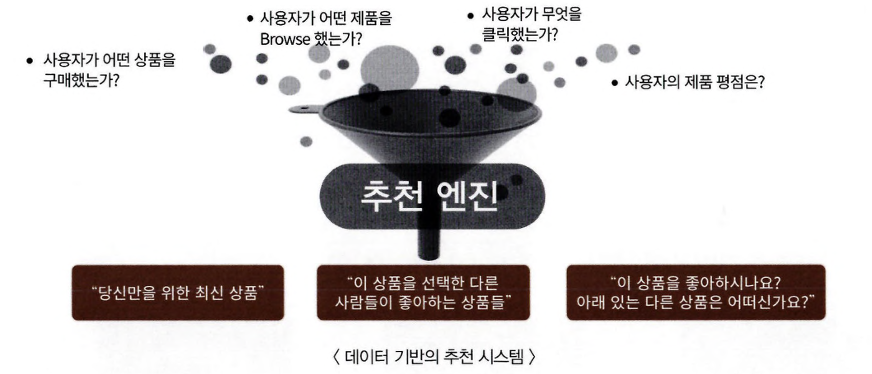

### 추천 시스템의 유형
- 콘텐츠 기반 필터링
- 협업 필터링
    - 최근접 이웃 협업 필터링
    - 잠재 요인 협업 필터링

-> 하이브리드 형식으로 콘텐츠 기반과 협업 기반을 적절히 결합하는 경우도 증가중


## 02. 콘텐츠 기반 필터링 추천 시스템
: 사용자가 특정 아이템을 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템 추천하는 방식

## 03. 최근접 이웃 협업 필터링
- 협업 필터링: 사용자의 행동양식만을 기반으로 추천 수행
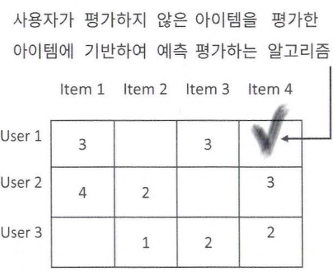
    - 목표: 사용자가 평가한 다른 아이템을 기반으로 사용자가 평가하지 않은 아이템의 예측 평가
    - 사용자 - 아이템 평점 행렬 데이터에만 의지해 추천 수행
        - 행: 개별 사용자
        - 열: 개별 아이템
        - 행과 열에 해당하는 값: 평점
        - 아이템 ↑, 평점 ↓ => 희소행렬 특성 O

    1. 최근접 이웃 방식(=메모리 협업 필터링)
        - 사용자 기반: 비슷한 사용자의 구매 아이템 추천

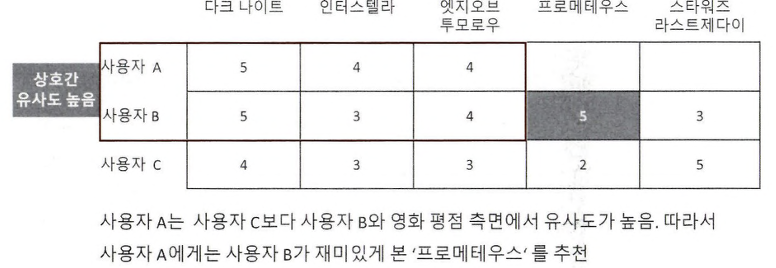
        
- 아이템 기반: 해당 상품 고른 고객들의 다음 구매 상품 추천  
    -> 대부분 아이템 기반 알고리즘 적용
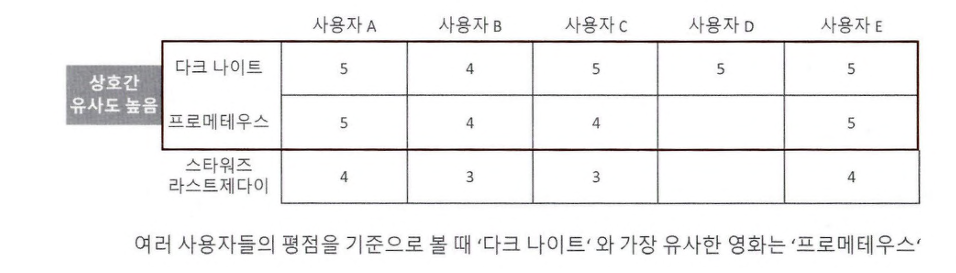

## 04. 잠재요인 협업 필터링
### 잠재 요인 협업 필터링의 이해
: 잠재요인 기반으로 다차원 희소 행렬인 사용자 - 아이템 행렬 데이터  
→ 저차원 밀집 행렬의 사용자- 잠재요인 행렬 + 아이템-잠재요인 행렬의 전치 행렬로 분해 가능
- 평점: 사용자의 특정 영화 장르에 대한 선호도 + 개별 영화의 그 장르적 특성값을 반영하여 결정

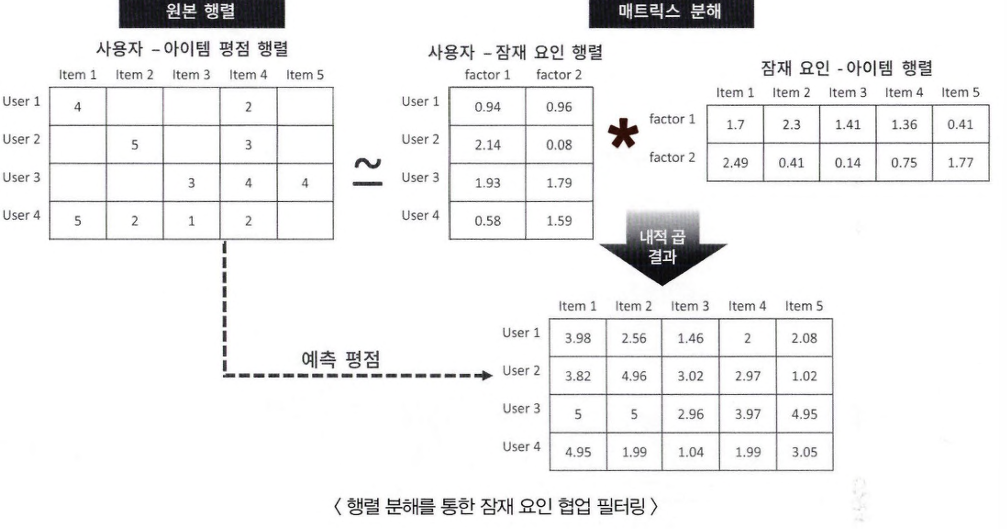


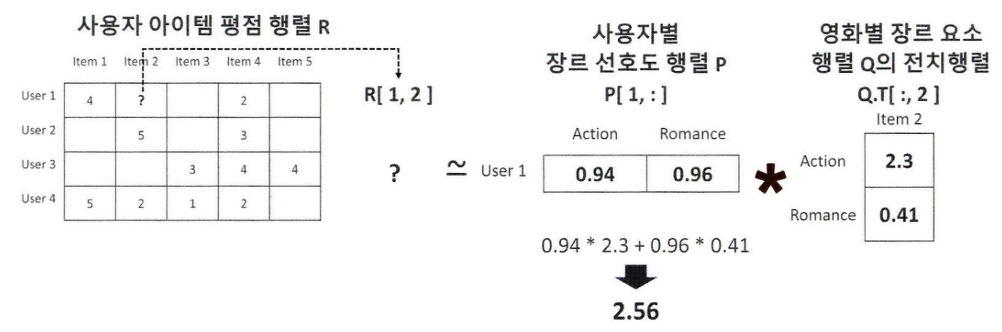

### 행렬 분해의 이해
: 다차원의 매트릭스를 저차원 매트릭스로 분해
- 대표적 기법
    - SVD Singular Vector Decomposition
    - NNMF Non Negative Matrix Factorization
- M개의 사용자 행과 N개의 아이템 열을 가진 평점행렬 R
- 사용자 - K 차원의 잠재요인 행렬 P
- K 차원 잠재요인 - 아이템 행렬 Q.T
         M: 총 사용자 수
         N: 총 아이템 수
         K: 잠재 요인의 차원 수
         R: M*N 차원의 사용자 - 아이템 평점 행렬
         P: 사용자와 잠재요인과의 관계값을 가지는 M*K 차원의 사용자-잠재요인 행렬
         Q: 아이템과 잠재요인과의 관계 값을 가지는 N*K 차원의 아이템-잠재요인 행렬
         Q.T: Q 매트릭스의 행과 열 값을 교환한 전치행렬

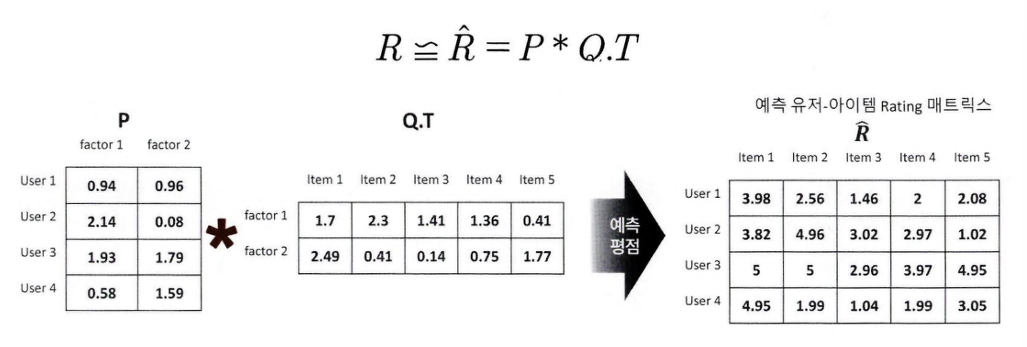

### 확률적 경사 하강법을 이용한 행렬 분해
: P와 Q 행렬로 계산된 예측 R 행렬값이 실제 R 행렬과 가장 최소의 오류를 가지도록 반복적으로 비용함수 최적화 → P와 Q 유추

In [ ]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정.
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
              [np.NaN, 5, np.NaN, 3, 1],
              [np.NaN, np.NaN, 3, 4, 4],
              [5, 2, 1, 2, np.NaN]])

num_users, num_items = R.shape
K = 3

# P와 Q 행렬의 크기를 지정하고 정규분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale = 1./K, size = (num_users, K))
Q = np.random.normal(scale = 1./K, size = (num_items, K))

In [ ]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P,Q.T)

    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)


    return rmse

- SGD 기반 행렬 분해

In [ ]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장.
non_zeros = [ (i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j]>0]

steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i, :] = P[i, :] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j, :] = Q[j, :] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 50) == 0:
            print('### iteration step: ', step, "rmse: ", rmse)

### iteration step:  0 rmse:  3.2489778594025154
### iteration step:  0 rmse:  3.2480990798066887
### iteration step:  0 rmse:  3.241464686428762
### iteration step:  0 rmse:  3.2396617633439706
### iteration step:  0 rmse:  3.239850067854985
### iteration step:  0 rmse:  3.2385288670354706
### iteration step:  0 rmse:  3.2366133044118723
### iteration step:  0 rmse:  3.2348021256776747
### iteration step:  0 rmse:  3.2295210104732472
### iteration step:  0 rmse:  3.2276749204068773
### iteration step:  0 rmse:  3.22778549907869
### iteration step:  0 rmse:  3.2264784143295184
### iteration step:  50 rmse:  0.5001203401883644
### iteration step:  50 rmse:  0.4999347903251159
### iteration step:  50 rmse:  0.4989641313165061
### iteration step:  50 rmse:  0.4988356634569485
### iteration step:  50 rmse:  0.49893407337923934
### iteration step:  50 rmse:  0.4983022879656944
### iteration step:  50 rmse:  0.4984098557903926
### iteration step:  50 rmse:  0.49791517988237466
### iteration 

In [ ]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.99  0.738 1.359 2.003 1.758]
 [6.603 4.978 0.95  2.98  1.003]
 [6.954 0.475 2.987 3.977 3.986]
 [4.968 2.004 1.007 2.018 1.171]]
